In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv("ma_lga_12345.csv")
# drop na's
df = df.dropna()
df.head()

,saledate,MA,type,bedrooms
0,30/09/2007,441854,house,2
1,31/12/2007,441854,house,2
2,31/03/2008,441854,house,2
3,30/06/2008,441854,house,2
4,30/09/2008,451583,house,2


In [13]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, 
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
 
demo_model = create_RNN(2, 1, (3,1), activation=['linear', 'linear'])

In [14]:
# Parameter split_percent defines the ratio of training examples
def get_train_test(csv, split_percent=0.8):
    df = pd.read_csv(csv, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data
 
csv = "ma_lga_12345.csv"
train_data, test_data, data = get_train_test(csv)

In [15]:
# Prepare the input X and target Y
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y
 
time_steps = 18
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [16]:
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
15/15 - 1s - loss: 0.1448 - 507ms/epoch - 34ms/step
Epoch 2/20
15/15 - 0s - loss: 0.1129 - 39ms/epoch - 3ms/step
Epoch 3/20
15/15 - 0s - loss: 0.0892 - 39ms/epoch - 3ms/step
Epoch 4/20
15/15 - 0s - loss: 0.0735 - 40ms/epoch - 3ms/step
Epoch 5/20
15/15 - 0s - loss: 0.0561 - 41ms/epoch - 3ms/step
Epoch 6/20
15/15 - 0s - loss: 0.0460 - 43ms/epoch - 3ms/step
Epoch 7/20
15/15 - 0s - loss: 0.0389 - 38ms/epoch - 3ms/step
Epoch 8/20
15/15 - 0s - loss: 0.0332 - 42ms/epoch - 3ms/step
Epoch 9/20
15/15 - 0s - loss: 0.0300 - 41ms/epoch - 3ms/step
Epoch 10/20
15/15 - 0s - loss: 0.0277 - 38ms/epoch - 3ms/step
Epoch 11/20
15/15 - 0s - loss: 0.0256 - 45ms/epoch - 3ms/step
Epoch 12/20
15/15 - 0s - loss: 0.0236 - 51ms/epoch - 3ms/step
Epoch 13/20
15/15 - 0s - loss: 0.0220 - 45ms/epoch - 3ms/step
Epoch 14/20
15/15 - 0s - loss: 0.0203 - 39ms/epoch - 3ms/step
Epoch 15/20
15/15 - 0s - loss: 0.0182 - 34ms/epoch - 2ms/step
Epoch 16/20
15/15 - 0s - loss: 0.0165 - 41ms/epoch - 3ms/step
Epoch 17/20
15/

In [17]:
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    
 
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

Train RMSE: 0.100 RMSE
Test RMSE: 0.048 RMSE


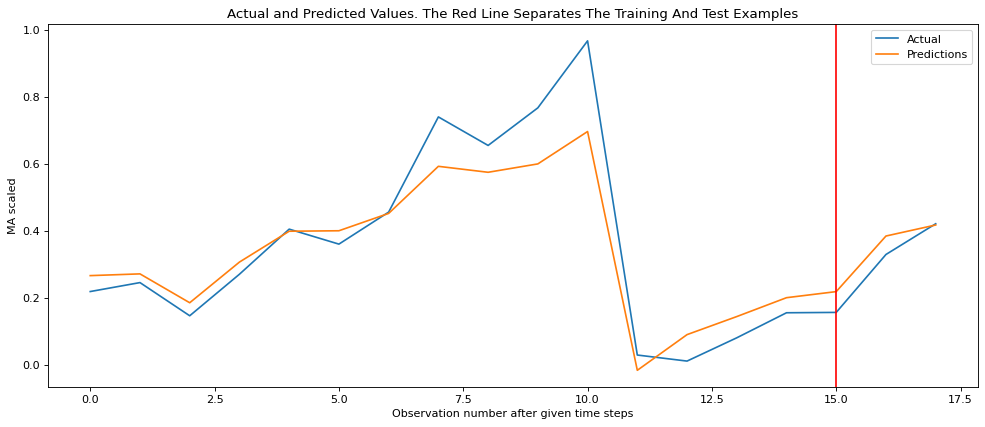

In [18]:
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('MA scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
plot_result(trainY, testY, train_predict, test_predict)

### Model 2
35% of the data used as test data. Time steps = 12.

In [19]:
train_data, test_data, data = get_train_test(csv, .65)

time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [20]:
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['relu', 'relu'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
18/18 - 0s - loss: 0.1507 - 459ms/epoch - 26ms/step
Epoch 2/20
18/18 - 0s - loss: 0.0710 - 35ms/epoch - 2ms/step
Epoch 3/20
18/18 - 0s - loss: 0.0383 - 40ms/epoch - 2ms/step
Epoch 4/20
18/18 - 0s - loss: 0.0194 - 39ms/epoch - 2ms/step
Epoch 5/20
18/18 - 0s - loss: 0.0123 - 38ms/epoch - 2ms/step
Epoch 6/20
18/18 - 0s - loss: 0.0087 - 34ms/epoch - 2ms/step
Epoch 7/20
18/18 - 0s - loss: 0.0067 - 36ms/epoch - 2ms/step
Epoch 8/20
18/18 - 0s - loss: 0.0050 - 37ms/epoch - 2ms/step
Epoch 9/20
18/18 - 0s - loss: 0.0044 - 40ms/epoch - 2ms/step
Epoch 10/20
18/18 - 0s - loss: 0.0037 - 37ms/epoch - 2ms/step
Epoch 11/20
18/18 - 0s - loss: 0.0032 - 39ms/epoch - 2ms/step
Epoch 12/20
18/18 - 0s - loss: 0.0030 - 41ms/epoch - 2ms/step
Epoch 13/20
18/18 - 0s - loss: 0.0027 - 35ms/epoch - 2ms/step
Epoch 14/20
18/18 - 0s - loss: 0.0024 - 37ms/epoch - 2ms/step
Epoch 15/20
18/18 - 0s - loss: 0.0022 - 35ms/epoch - 2ms/step
Epoch 16/20
18/18 - 0s - loss: 0.0020 - 30ms/epoch - 2ms/step
Epoch 17/20
18/

In [21]:
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

Train RMSE: 0.034 RMSE
Test RMSE: 0.040 RMSE


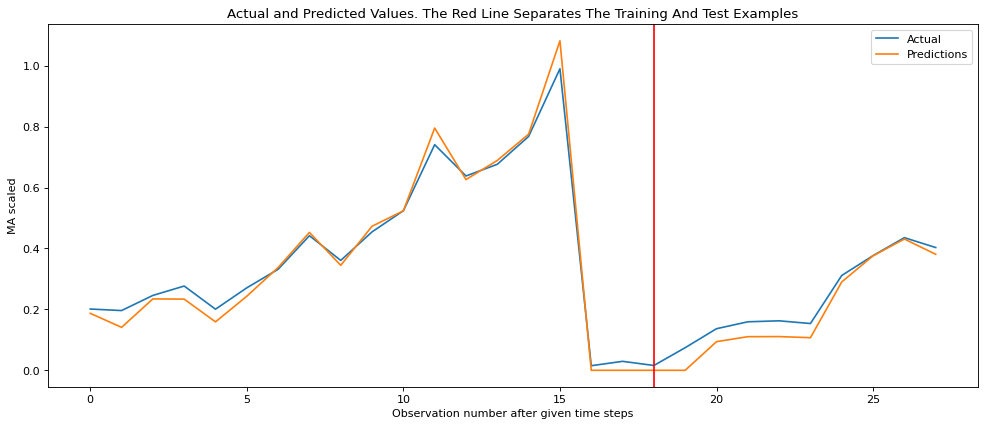

In [22]:
plot_result(trainY, testY, train_predict, test_predict)

### Model 3
72% of the data used for training. 28% for test. Time step = 6

In [39]:
train_data, test_data, data = get_train_test(csv, .76)

time_steps = 14
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [40]:
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['relu', 'relu'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
18/18 - 0s - loss: 7.9836e-04 - 467ms/epoch - 26ms/step
Epoch 2/20
18/18 - 0s - loss: 2.7453e-04 - 37ms/epoch - 2ms/step
Epoch 3/20
18/18 - 0s - loss: 2.3169e-04 - 41ms/epoch - 2ms/step
Epoch 4/20
18/18 - 0s - loss: 1.9081e-04 - 46ms/epoch - 3ms/step
Epoch 5/20
18/18 - 0s - loss: 1.3630e-04 - 58ms/epoch - 3ms/step
Epoch 6/20
18/18 - 0s - loss: 1.1498e-04 - 58ms/epoch - 3ms/step
Epoch 7/20
18/18 - 0s - loss: 9.8625e-05 - 65ms/epoch - 4ms/step
Epoch 8/20
18/18 - 0s - loss: 8.6894e-05 - 56ms/epoch - 3ms/step
Epoch 9/20
18/18 - 0s - loss: 7.7766e-05 - 49ms/epoch - 3ms/step
Epoch 10/20
18/18 - 0s - loss: 7.8319e-05 - 50ms/epoch - 3ms/step
Epoch 11/20
18/18 - 0s - loss: 7.7248e-05 - 49ms/epoch - 3ms/step
Epoch 12/20
18/18 - 0s - loss: 7.3291e-05 - 60ms/epoch - 3ms/step
Epoch 13/20
18/18 - 0s - loss: 8.1020e-05 - 58ms/epoch - 3ms/step
Epoch 14/20
18/18 - 0s - loss: 7.7467e-05 - 68ms/epoch - 4ms/step
Epoch 15/20
18/18 - 0s - loss: 8.3141e-05 - 49ms/epoch - 3ms/step
Epoch 16/20
18/18

In [41]:
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

Train RMSE: 0.008 RMSE
Test RMSE: 0.006 RMSE


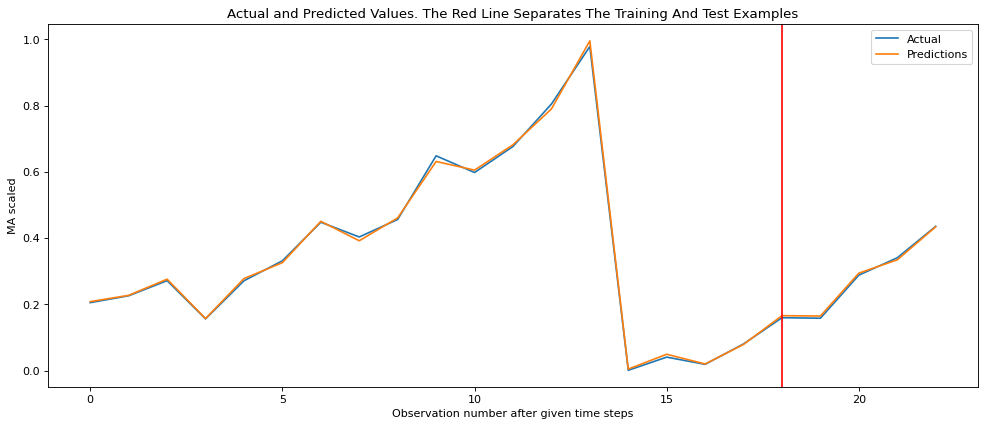

In [42]:
plot_result(trainY, testY, train_predict, test_predict)

### Summary

Comparing the three models, we can see that the performance varies drastically given different parameters. The best performing model used relu as the activation function, used time steps of 14, and had 24% of the data to test on. The other two models performed decent but weren't as reliable as the final model. Using the best performing model, we can forecast future sales with a high level of certainty.